## 📌 Step 2: Data Cleaning, Feature Engineering & Summary Analysis

### Objective
Prepare the consolidated stock dataset for exploratory analysis and modeling by:
- Cleaning data types
- Creating return and volatility features
- Generating company-level summary statistics
- Producing high-level visual summaries

This step transforms **raw price data into financial signals**.

---

## 🔹 Data Loading & Time-Series Preparation

### Actions Performed
- Load the consolidated `all_stocks.csv` dataset
- Convert the `Date` column to datetime format
- Remove invalid or missing dates
- Sort data by `Company` and `Date` to preserve chronological order

### Why This Matters
Time-series models require **strict chronological ordering**.  
Any date inconsistencies can invalidate financial analysis.

---

## 🔹 Numeric Data Validation

### Columns Validated
- Open
- High
- Low
- Close
- Adjusted_Close
- Volume

All price-related columns are coerced to numeric values, and rows with invalid adjusted prices are removed.

### Reason
`Adjusted_Close` is the foundation for return and volatility calculations, as it accounts for:
- Stock splits
- Dividends
- Corporate actions

---

## 🔹 Feature Engineering

### 1️⃣ Daily Percentage Returns
Calculated per company to capture day-to-day price movement.

### 2️⃣ Log Returns
Preferred for financial modeling because they:
- Stabilize variance
- Handle compounding naturally
- Are additive over time

### 3️⃣ Rolling 30-Day Annualized Volatility
Computed using:
- 30-day rolling standard deviation of log returns
- Annualized using √252 trading days

### Why Volatility?
Volatility represents **market risk**, which is empirically more predictable than short-term returns.

---

## 🔹 Company-Level Summary Statistics

For each company, the following metrics are computed:
- Mean daily return
- Mean log return
- Annualized volatility
- Total number of trading days

These summaries enable:
- Cross-company risk comparison
- Identification of high-volatility stocks
- Ranking of top return contributors

---

## 🔹 Visual Summary (Pie Charts)

### Visualizations Created
- Volatility share among high-risk stocks
- Mean daily return contribution of top-performing companies
- Proportion of historical data coverage across selected companies

### Purpose
These visuals provide:
- Intuitive comparison of risk and return concentration
- High-level insights suitable for presentations and reports

---

## 🔹 Exporting Processed Dataset

### Output
- Fully processed dataset saved as `all_stocks_processed.csv`

### Why Save This File?
- Ensures reproducibility
- Prevents repeated preprocessing
- Acts as the standardized input for EDA and modeling notebooks

---

## ✅ Outcome of This Step
- Clean, feature-rich dataset
- Financially meaningful variables
- Ready for exploratory analysis and forecasting

This step completes **data preprocessing and feature engineering**, forming the backbone of all downstream analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\AVI SHARMA\Documents\Project1\all_stocks.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df = df.dropna(subset=["Date"])
df = df.sort_values(["Company", "Date"]).reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Adjusted_Close,Volume,Company
0,2015-01-02,137.71739196777344,138.02674865722656,136.06187438964844,137.17391967773438,96.1085433959961,2531214,3M
1,2015-01-05,136.28762817382812,136.82273864746094,133.84616088867188,134.08026123046875,93.94104766845703,4416708,3M
2,2015-01-06,134.4648895263672,134.92474365234375,131.88963317871094,132.65049743652344,92.93929290771484,4224272,3M
3,2015-01-07,133.69564819335938,134.0133819580078,132.89297485351562,133.61204528808594,93.61298370361328,3685235,3M
4,2015-01-08,134.32273864746094,136.8645477294922,134.21405029296875,136.8143768310547,95.8566665649414,3758908,3M


In [3]:
price_cols = [
    "Open", "High", "Low",
    "Close", "Adjusted_Close", "Volume"
]

for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [4]:
df = df.dropna(subset=["Adjusted_Close"])

In [5]:
df["Daily_Return"] = (
    df.groupby("Company")["Adjusted_Close"]
      .pct_change()
)
df["Log_Return"] = (
    np.log(df["Adjusted_Close"]) -
    np.log(df.groupby("Company")["Adjusted_Close"].shift(1))
)


rolling_window = 30
trading_days = 252
df["Rolling_Volatility_30D"] = (
    df.groupby("Company")["Log_Return"]
      .rolling(rolling_window)
      .std()
      .reset_index(level=0, drop=True)
      * np.sqrt(trading_days)
)

df.head()

c:\Users\AVI SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\AVI SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Open,High,Low,Close,Adjusted_Close,Volume,Company,Daily_Return,Log_Return,Rolling_Volatility_30D
0,2015-01-02,137.717392,138.026749,136.061874,137.173920,96.108543,2531214,3M,NaN,NaN,NaN
1,2015-01-05,136.287628,136.822739,133.846161,134.080261,93.941048,4416708,3M,-0.022553,-0.022811,NaN
2,2015-01-06,134.464890,134.924744,131.889633,132.650497,92.939293,4224272,3M,-0.010664,-0.010721,NaN
3,2015-01-07,133.695648,134.013382,132.892975,133.612045,93.612984,3685235,3M,0.007249,0.007223,NaN
4,2015-01-08,134.322739,136.864548,134.214050,136.814377,95.856667,3758908,3M,0.023968,0.023685,NaN


In [6]:
df[[
    "Adjusted_Close",
    "Daily_Return",
    "Log_Return",
    "Rolling_Volatility_30D"
]].head(10)

,Adjusted_Close,Daily_Return,Log_Return,Rolling_Volatility_30D
0,96.108543,NaN,NaN,NaN
1,93.941048,-0.022553,-0.022811,NaN
2,92.939293,-0.010664,-0.010721,NaN
3,93.612984,0.007249,0.007223,NaN
4,95.856667,0.023968,0.023685,NaN
5,94.679161,-0.012284,-0.012360,NaN
6,94.163635,-0.005445,-0.005460,NaN
7,94.093353,-0.000746,-0.000747,NaN
8,93.636406,-0.004856,-0.004868,NaN
9,93.530975,-0.001126,-0.001127,NaN


In [7]:
summary = (
    df.groupby("Company")
      .agg(
          mean_daily_return=("Daily_Return", "mean"),
          mean_log_return=("Log_Return", "mean"),
          annualized_volatility=("Log_Return", lambda x: x.std() * np.sqrt(252)),
          total_days=("Date", "count")
      )
      .dropna()
)

In [8]:
summary.sort_values("annualized_volatility", ascending=False).head(10)

,mean_daily_return,mean_log_return,annualized_volatility,total_days
Company,,,,
Ace_Hardware,0.003984,-0.000146,1.775814,2765
VF,0.001829,-0.000999,1.079655,1084
Carvana,0.003629,0.001677,0.987204,2181
Community_Health_Systems,0.000402,-0.000954,0.835053,2765
Oscar_Health,0.000534,-0.000721,0.790602,1214
QVC_Group,-0.000411,-0.001589,0.772367,2795
Fannie_Mae,0.001735,0.000560,0.761552,2765
Hertz_Global_Holdings,-0.000282,-0.001452,0.759051,1130
Freddie_Mac,0.001640,0.000544,0.737875,2765


In [9]:
summary.sort_values("annualized_volatility").head(10)

,mean_daily_return,mean_log_return,annualized_volatility,total_days
Company,,,,
Dana,0.000440,0.000439,0.025549,19
Insight_Enterprises,0.000315,0.000258,0.167621,1652
Coca-Cola,0.000372,0.000310,0.178306,2765
Johnson_and_Johnson,0.000424,0.000358,0.182290,2765
Procter_and_Gamble,0.000348,0.000280,0.185108,2765
Republic_Services,0.000742,0.000673,0.187292,2765
Kellanova,0.000328,0.000258,0.187494,2785
PepsiCo,0.000345,0.000272,0.190644,2765
Waste_Management,0.000677,0.000605,0.190754,2765


In [10]:
summary.sort_values("mean_daily_return", ascending=False).head(10)

,mean_daily_return,mean_log_return,annualized_volatility,total_days
Company,,,,
GE_Vernova,0.004257,0.003667,0.543889,442
Ace_Hardware,0.003984,-0.000146,1.775814,2765
Carvana,0.003629,0.001677,0.987204,2181
BrightSpring_Health_Services,0.002928,0.002547,0.434922,484
Constellation_Energy,0.002670,0.002196,0.486458,991
Nvidia,0.002625,0.002157,0.483687,2765
Advanced_Micro_Devices,0.002259,0.001588,0.578241,2765
Vertiv_Holdings,0.002098,0.001507,0.550156,1863
Tesla,0.001903,0.001243,0.575931,2765


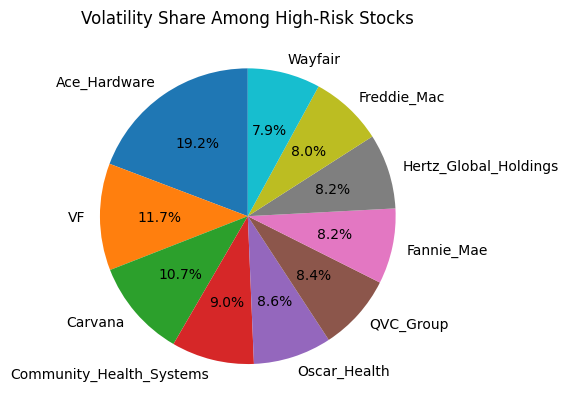

In [11]:
import matplotlib.pyplot as plt

data = {
    "Ace_Hardware": 1.775814,
    "VF": 1.079655,
    "Carvana": 0.987204,
    "Community_Health_Systems": 0.835053,
    "Oscar_Health": 0.790602,
    "QVC_Group": 0.772367,
    "Fannie_Mae": 0.761552,
    "Hertz_Global_Holdings": 0.759051,
    "Freddie_Mac": 0.737875,
    "Wayfair": 0.733737
}

labels = data.keys()
sizes = data.values()

plt.figure()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Volatility Share Among High-Risk Stocks")
plt.show()

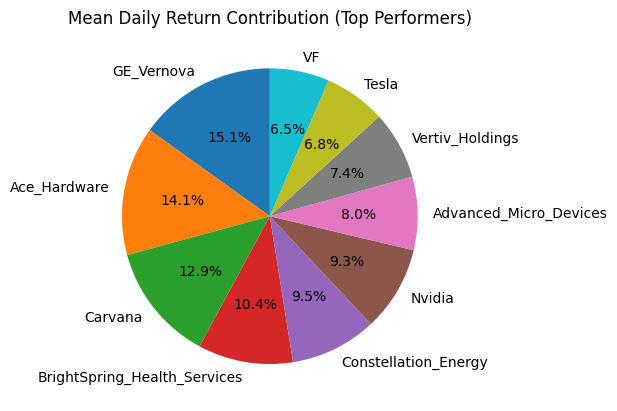

In [12]:
data = {
    "GE_Vernova": 0.004257,
    "Ace_Hardware": 0.003984,
    "Carvana": 0.003629,
    "BrightSpring_Health_Services": 0.002928,
    "Constellation_Energy": 0.002670,
    "Nvidia": 0.002625,
    "Advanced_Micro_Devices": 0.002259,
    "Vertiv_Holdings": 0.002098,
    "Tesla": 0.001903,
    "VF": 0.001829
}

labels = data.keys()
sizes = data.values()

plt.figure()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Mean Daily Return Contribution (Top Performers)")
plt.show()

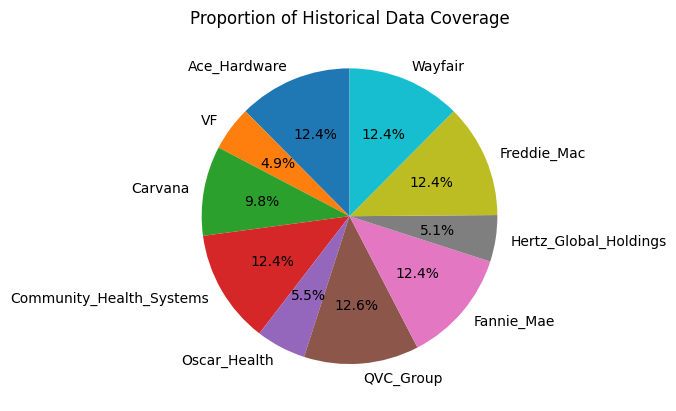

In [13]:
data = {
    "Ace_Hardware": 2765,
    "VF": 1084,
    "Carvana": 2181,
    "Community_Health_Systems": 2765,
    "Oscar_Health": 1214,
    "QVC_Group": 2795,
    "Fannie_Mae": 2765,
    "Hertz_Global_Holdings": 1130,
    "Freddie_Mac": 2765,
    "Wayfair": 2765
}

labels = data.keys()
sizes = data.values()

plt.figure()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Historical Data Coverage")
plt.show()


In [14]:
output_dir = r"C:\Users\AVI SHARMA\Documents\Project1\data\processed"
import os
os.makedirs(output_dir, exist_ok=True)
processed_path = os.path.join(output_dir, "all_stocks_processed.csv")

df.to_csv(processed_path, index=False)
print("Saved:", processed_path)

Saved: C:\Users\AVI SHARMA\Documents\Project1\data\processed\all_stocks_processed.csv
